# kdb+/q 🏎️

Just load some trade & quote data to play with.

In [25]:
h:hopen `:localhost:5011; / open connection with RDB
trade:h`trade;            / get intraday trades

### Table Basics 💹

There are many ways to learn a language. Here, we embrace a practical approach and go straight to the point, only explaining the details as they become necessary. You are accustomed to dealing with dataframes; we show you now a table, the q counterpart.

In [2]:
trade

time                 sym  price    size
---------------------------------------
0D12:21:01.368444000 DELL 178.5163 798 
0D12:21:01.368444000 INTC 128.0462 627 
0D12:21:02.368412000 INTC 128.0338 338 
0D12:21:02.368412000 AMD  45.14688 209 
0D12:21:03.368428000 DELL 178.5078 401 
0D12:21:03.368428000 NVDA 341.318  11  
0D12:21:04.368452000 AMZN 191.1179 205 
0D12:21:04.368452000 INTC 128.0281 728 
0D12:21:05.368442000 AMZN 191.1218 372 
0D12:21:05.368442000 AMZN 191.1082 19  
0D12:21:06.368434000 DELL 178.5082 649 
0D12:21:06.368434000 AMD  45.15094 288 
0D12:21:07.368438000 NVDA 341.3204 99  
0D12:21:07.368438000 AMD  45.14721 843 
0D12:21:08.367962000 INTC 128.017  573 
0D12:21:08.367962000 AMD  45.14462 544 
0D12:21:09.368431000 AMD  45.14291 743 
0D12:21:09.368431000 INTC 128.0098 11  
0D12:21:10.367574000 DELL 178.4986 300 
0D12:21:10.367574000 INTC 128.0222 313 
..


As can be seen, our q table has 4 columns (`time`, `sym`, `price` and `sym`) with different types. At this point, we could be interested in exploring more information about this table, such as its length:

In [3]:
count trade

648


The `meta` function supplies further detail about the table schema.

In [4]:
meta trade

c    | t f a
-----| -----
time | n    
sym  | s   g
price| f    
size | i    


The [Data types](https://code.kx.com/q/basics/datatypes/) section at the KX official documentation turns out to be quite useful in understanding this table.

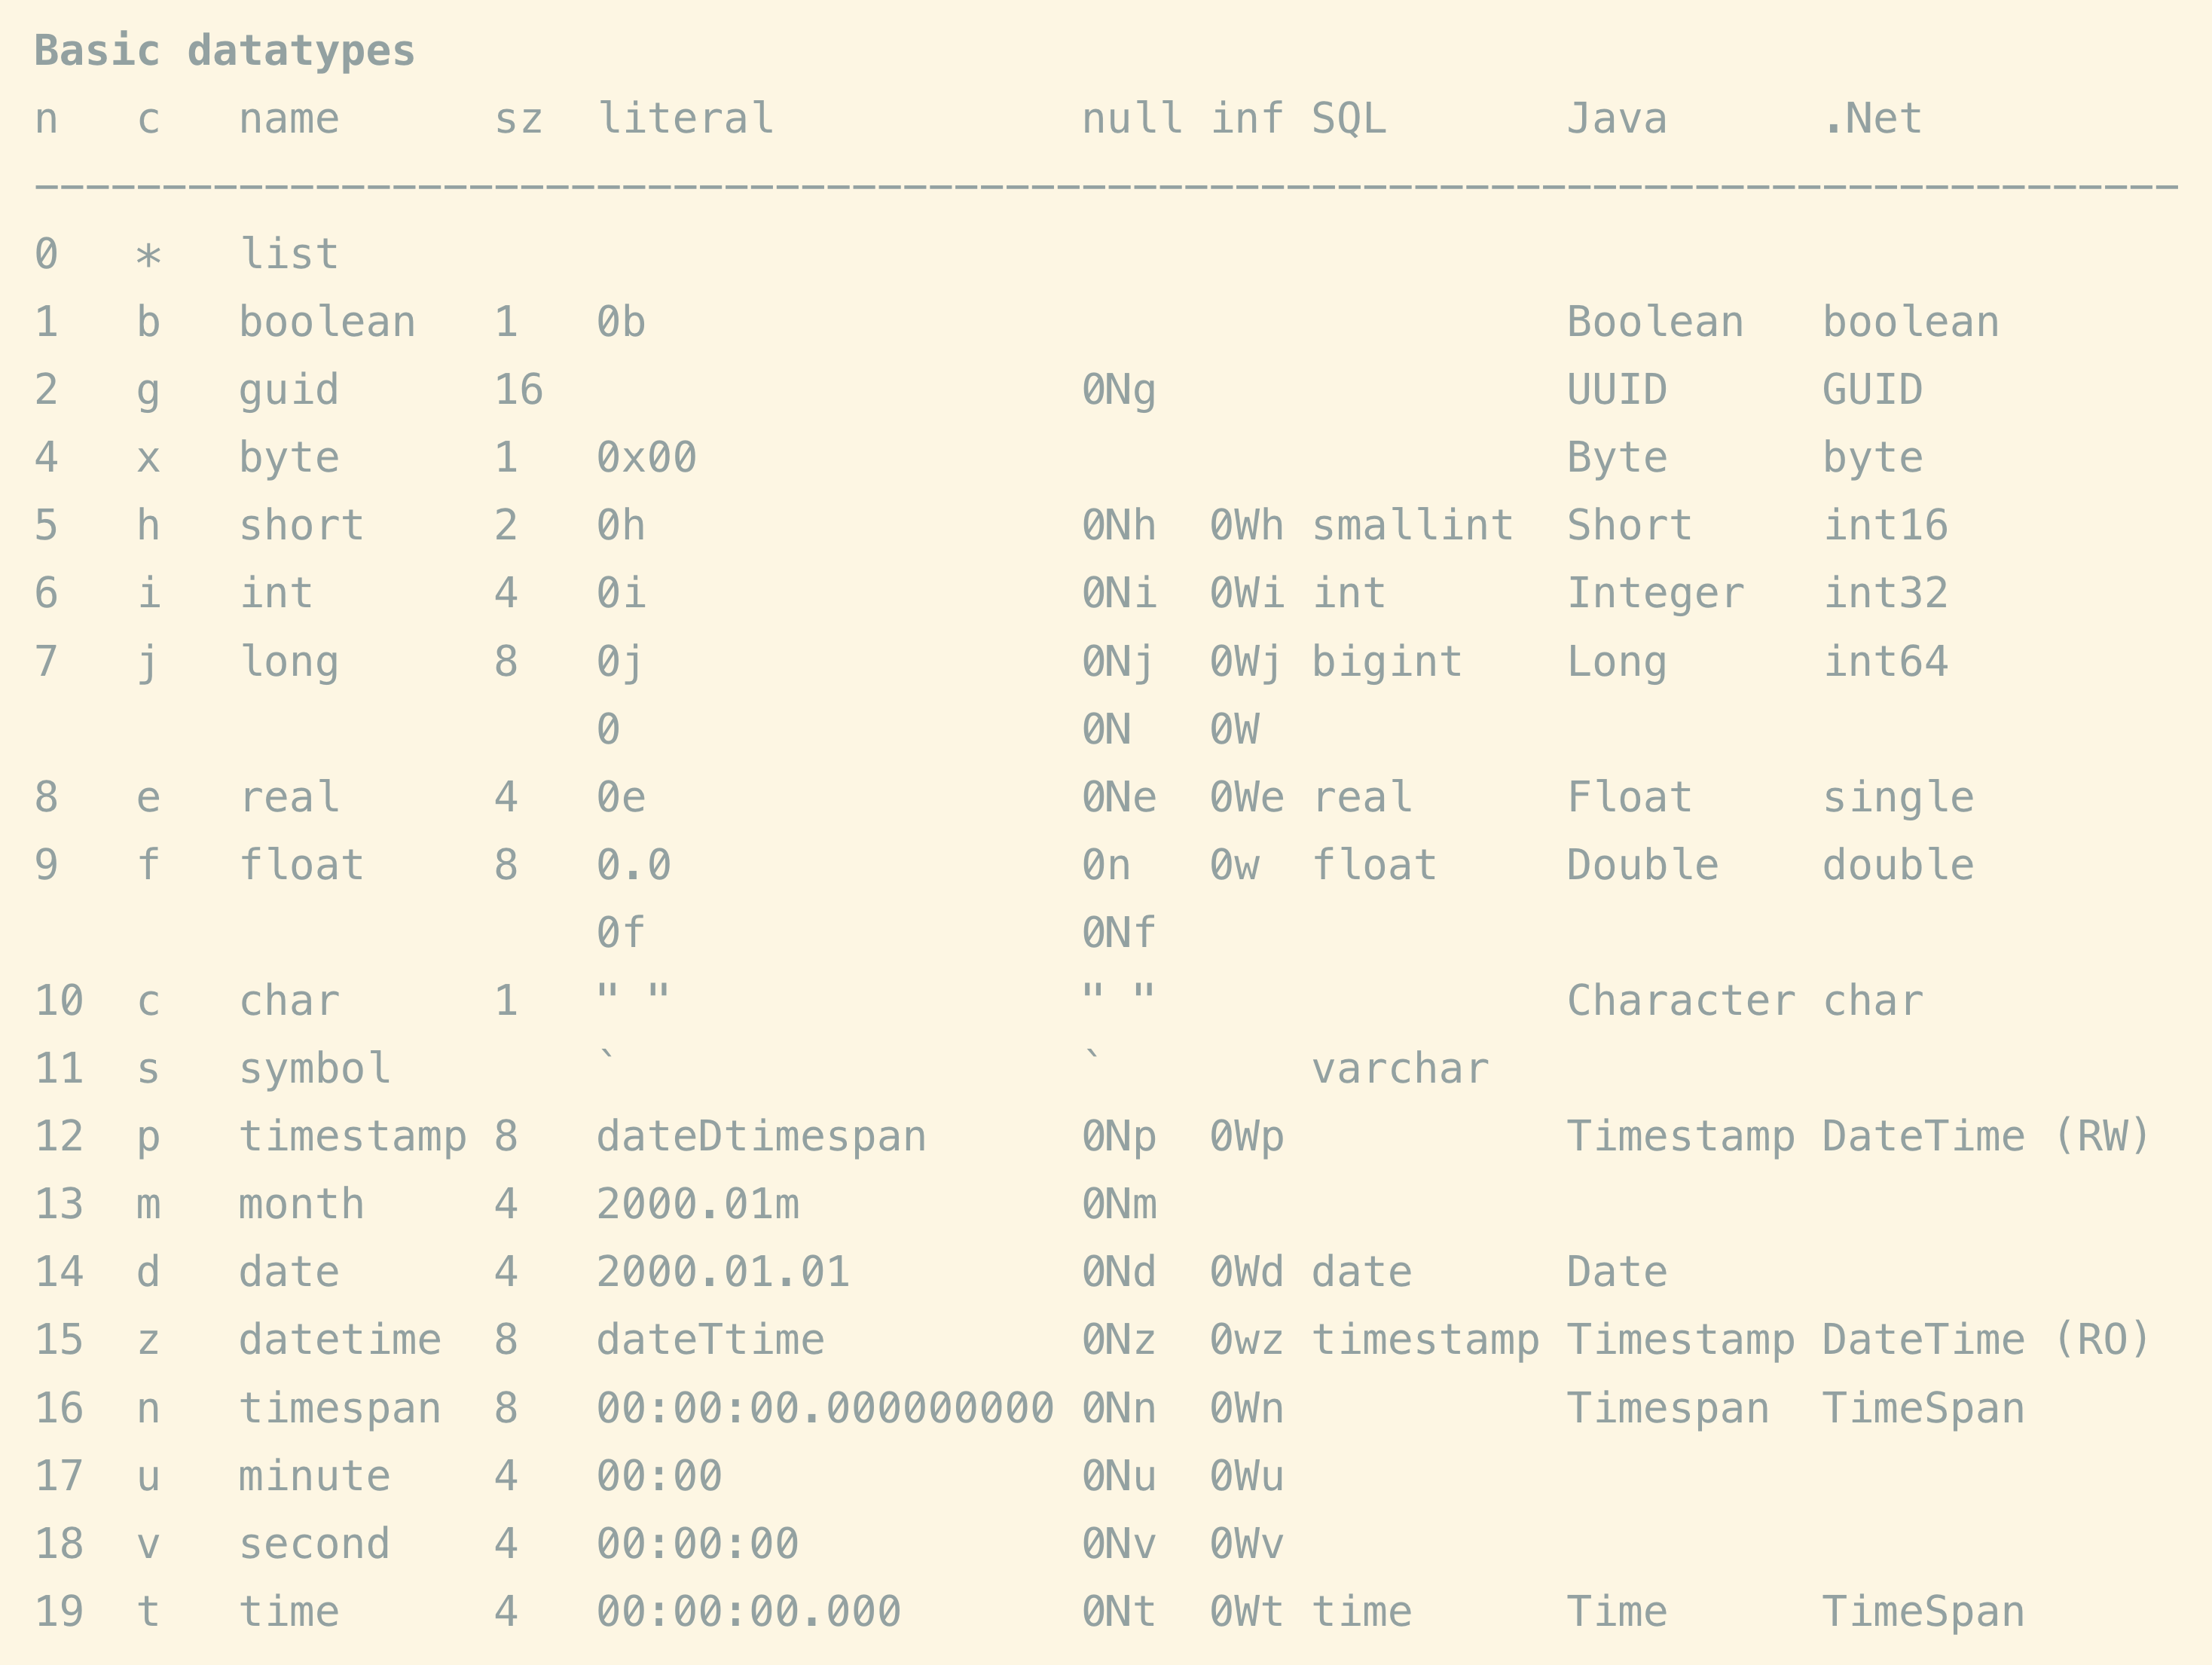

### Querying Tables: Warming Up 🏃

Suppose you are only interested in AMD trades. What is the way to filter them out? Fortunately, q provides q-sql, a collection of functions that makes querying tables feel like SQL... with steroids!

In [6]:
select from trade where sym=`AMD

time                 sym price    size
--------------------------------------
0D12:21:02.368412000 AMD 45.14688 209 
0D12:21:06.368434000 AMD 45.15094 288 
0D12:21:07.368438000 AMD 45.14721 843 
0D12:21:08.367962000 AMD 45.14462 544 
0D12:21:09.368431000 AMD 45.14291 743 
0D12:21:13.368029000 AMD 45.14245 945 
0D12:21:15.368434000 AMD 45.14421 588 
0D12:21:16.368429000 AMD 45.14281 994 
0D12:21:19.368435000 AMD 45.14724 532 
0D12:21:22.368429000 AMD 45.15133 328 
0D12:21:26.368413000 AMD 45.14953 902 
0D12:21:27.368365000 AMD 45.15383 321 
0D12:21:27.368365000 AMD 45.15829 87  
0D12:21:28.367746000 AMD 45.1588  713 
0D12:21:29.368360000 AMD 45.15886 358 
0D12:21:29.368360000 AMD 45.1587  455 
0D12:21:30.368323000 AMD 45.1603  32  
0D12:21:36.368367000 AMD 45.16288 121 
0D12:21:37.367481000 AMD 45.16698 244 
0D12:21:40.368430000 AMD 45.16544 691 
..


<div class="alert alert-info">

Q doesn't define the string type explicitly. Instead, it defines the `char` and `symbol` types to represent textual data. Essentially, we could see a string as a list of chars. However, in this particular case, where asset names tend to repeat over and over, it's better to use symbols, which are internally represented in a numeric way. Literal symbols have the format \`foo.
</div>

What about calculating the whole trading volume? For this task, we could use the `sum` aggregate function.

In [10]:
select sum size from trade

size  
------
318926


Is `sum` an operator restricted to q-sql? Not really. In fact, `sum` is a function that is typically applied over lists. Since tables are just a list of columns, we can reuse this function for tables as well. To illustrate this idea, let's convert a table column into a list:

In [12]:
show sz:trade`size

798 627 338 209 401 11 205 728 372 19 649 288 99 843 573 544 743 11 300 313 1..


We can check the type of any value by means of `type`?

In [15]:
type first sz

-6h


In [16]:
type sz

6h


<div class="alert alert-info">

Atoms have a negative number as their type (see Data types table above). Vectors have a positive value associated with them.
</div>

As mentioned before, we can use `sum` over this list, where we should get the expected value.

In [17]:
sum sz

318926i


What about calculating the accumulated trading volume? In fact, we could use `sums`:

In [18]:
sz

798 627 338 209 401 11 205 728 372 19 649 288 99 843 573 544 743 11 300 313 1..


In [19]:
sums sz

798 1425 1763 1972 2373 2384 2589 3317 3689 3708 4357 4645 4744 5587 6160 670..


As expected we can use `sums` in combination with q-sql:

In [21]:
update asz:sums size from trade

time                 sym  price    size asz 
--------------------------------------------
0D12:21:01.368444000 DELL 178.5163 798  798 
0D12:21:01.368444000 INTC 128.0462 627  1425
0D12:21:02.368412000 INTC 128.0338 338  1763
0D12:21:02.368412000 AMD  45.14688 209  1972
0D12:21:03.368428000 DELL 178.5078 401  2373
0D12:21:03.368428000 NVDA 341.318  11   2384
0D12:21:04.368452000 AMZN 191.1179 205  2589
0D12:21:04.368452000 INTC 128.0281 728  3317
0D12:21:05.368442000 AMZN 191.1218 372  3689
0D12:21:05.368442000 AMZN 191.1082 19   3708
0D12:21:06.368434000 DELL 178.5082 649  4357
0D12:21:06.368434000 AMD  45.15094 288  4645
0D12:21:07.368438000 NVDA 341.3204 99   4744
0D12:21:07.368438000 AMD  45.14721 843  5587
0D12:21:08.367962000 INTC 128.017  573  6160
0D12:21:08.367962000 AMD  45.14462 544  6704
0D12:21:09.368431000 AMD  45.14291 743  7447
0D12:21:09.368431000 INTC 128.0098 11   7458
0D12:21:10.367574000 DELL 178.4986 300  7758
0D12:21:10.367574000 INTC 128.0222 313  8071
..


As can be seen, q-sql goes beyond _select_ statements, there is also an `update` one!

<div class="alert alert-info">

You could use any list operator in the context of q-sql, even the ones defined by yourself! This is one of the reasons that lead to the concept of _SQL with steroids_.
</div>

What if we wanted to calculate the accumulated volume __by__ symbol? 

In [22]:
update asz:sums size by sym from trade

time                 sym  price    size asz 
--------------------------------------------
0D12:21:01.368444000 DELL 178.5163 798  798 
0D12:21:01.368444000 INTC 128.0462 627  627 
0D12:21:02.368412000 INTC 128.0338 338  965 
0D12:21:02.368412000 AMD  45.14688 209  209 
0D12:21:03.368428000 DELL 178.5078 401  1199
0D12:21:03.368428000 NVDA 341.318  11   11  
0D12:21:04.368452000 AMZN 191.1179 205  205 
0D12:21:04.368452000 INTC 128.0281 728  1693
0D12:21:05.368442000 AMZN 191.1218 372  577 
0D12:21:05.368442000 AMZN 191.1082 19   596 
0D12:21:06.368434000 DELL 178.5082 649  1848
0D12:21:06.368434000 AMD  45.15094 288  497 
0D12:21:07.368438000 NVDA 341.3204 99   110 
0D12:21:07.368438000 AMD  45.14721 843  1340
0D12:21:08.367962000 INTC 128.017  573  2266
0D12:21:08.367962000 AMD  45.14462 544  1884
0D12:21:09.368431000 AMD  45.14291 743  2627
0D12:21:09.368431000 INTC 128.0098 11   2277
0D12:21:10.367574000 DELL 178.4986 300  2148
0D12:21:10.367574000 INTC 128.0222 313  2590
..


Once we have warmed up, it's time to show a few simple real-case examples.

### Example 1: OHLC (Open-High-Low-Close) 🕯️

We can create intraday time intervals to calculate the open (first), high (max), low (min) and close (last) prices for each of them.

In [31]:
select Open:first price,High:max price,Low:min price,Close:last price,Volume:sum size
  by 2 xbar `minute$time / 2 minute intervals
  from trade 
  where sym=`AMD

time | Open     High     Low      Close    Volume
-----| ------------------------------------------
12:20| 45.14688 45.17205 45.14245 45.1686  13383 
12:22| 45.1708  45.18736 45.16201 45.17266 24587 
12:24| 45.17014 45.17014 45.14741 45.15694 27638 
12:26| 45.15643 45.16023 45.13558 45.13897 31086 
12:28| 45.14203 45.14203 45.09722 45.10754 30263 
12:30| 45.10657 45.12507 45.09823 45.12076 27274 
12:32| 45.11658 45.14484 45.11439 45.13879 17586 
12:34| 45.13457 45.15191 45.11622 45.11622 24741 
12:36| 45.11366 45.11833 45.08998 45.10417 22348 
12:38| 45.10821 45.11611 45.08799 45.08799 20735 
12:40| 45.08919 45.12852 45.08919 45.12116 23460 
12:42| 45.12329 45.14849 45.12329 45.14499 27799 
12:44| 45.14603 45.1676  45.13426 45.16682 21750 
12:46| 45.16567 45.17533 45.1596  45.17381 22527 
12:48| 45.17685 45.18268 45.15612 45.16177 25315 
12:50| 45.15974 45.17687 45.15237 45.16575 27265 
12:52| 45.16994 45.17368 45.13309 45.13309 26693 
12:54| 45.13281 45.15322 45.13281 45.15031 26349 


There are two several aspects to understand in the previous snippet. First, there is `xbar`:

In [35]:
3 xbar til 10

0 0 0 3 3 3 6 6 6 9


<div class="alert alert-warning">

As for the precedence of operators, there is only one rule: _left of right_. This means that all expressions are evaluated from right to left.
</div>

The secod important aspect is that time data has a numerical representation, so for example, dealing with offsets is trivial.

In [41]:
00:00+5

00:05


<div class="alert alert-success">

Dealing with dates (offset, comparison, etc.) in q is remarkably pleasant.
</div>

Finally we can cast among different types by means of the `$` operator.

In [53]:
trade`time
`time$trade`time

0D12:21:01.368444000 0D12:21:01.368444000 0D12:21:02.368412000 0D12:21:02.368..


12:21:01.368 12:21:01.368 12:21:02.368 12:21:02.368 12:21:03.368 12:21:03.368..


If we combine all of them, we get a very nice foundation to group by intervals.

In [49]:
distinct 5 xbar `minute$trade`time

12:20 12:25 12:30 12:35 12:40 12:45 12:50 12:55 13:00 13:05 13:10


Once we have our data structured this way, candlesticks seem to be the perfect tool to visualize it.

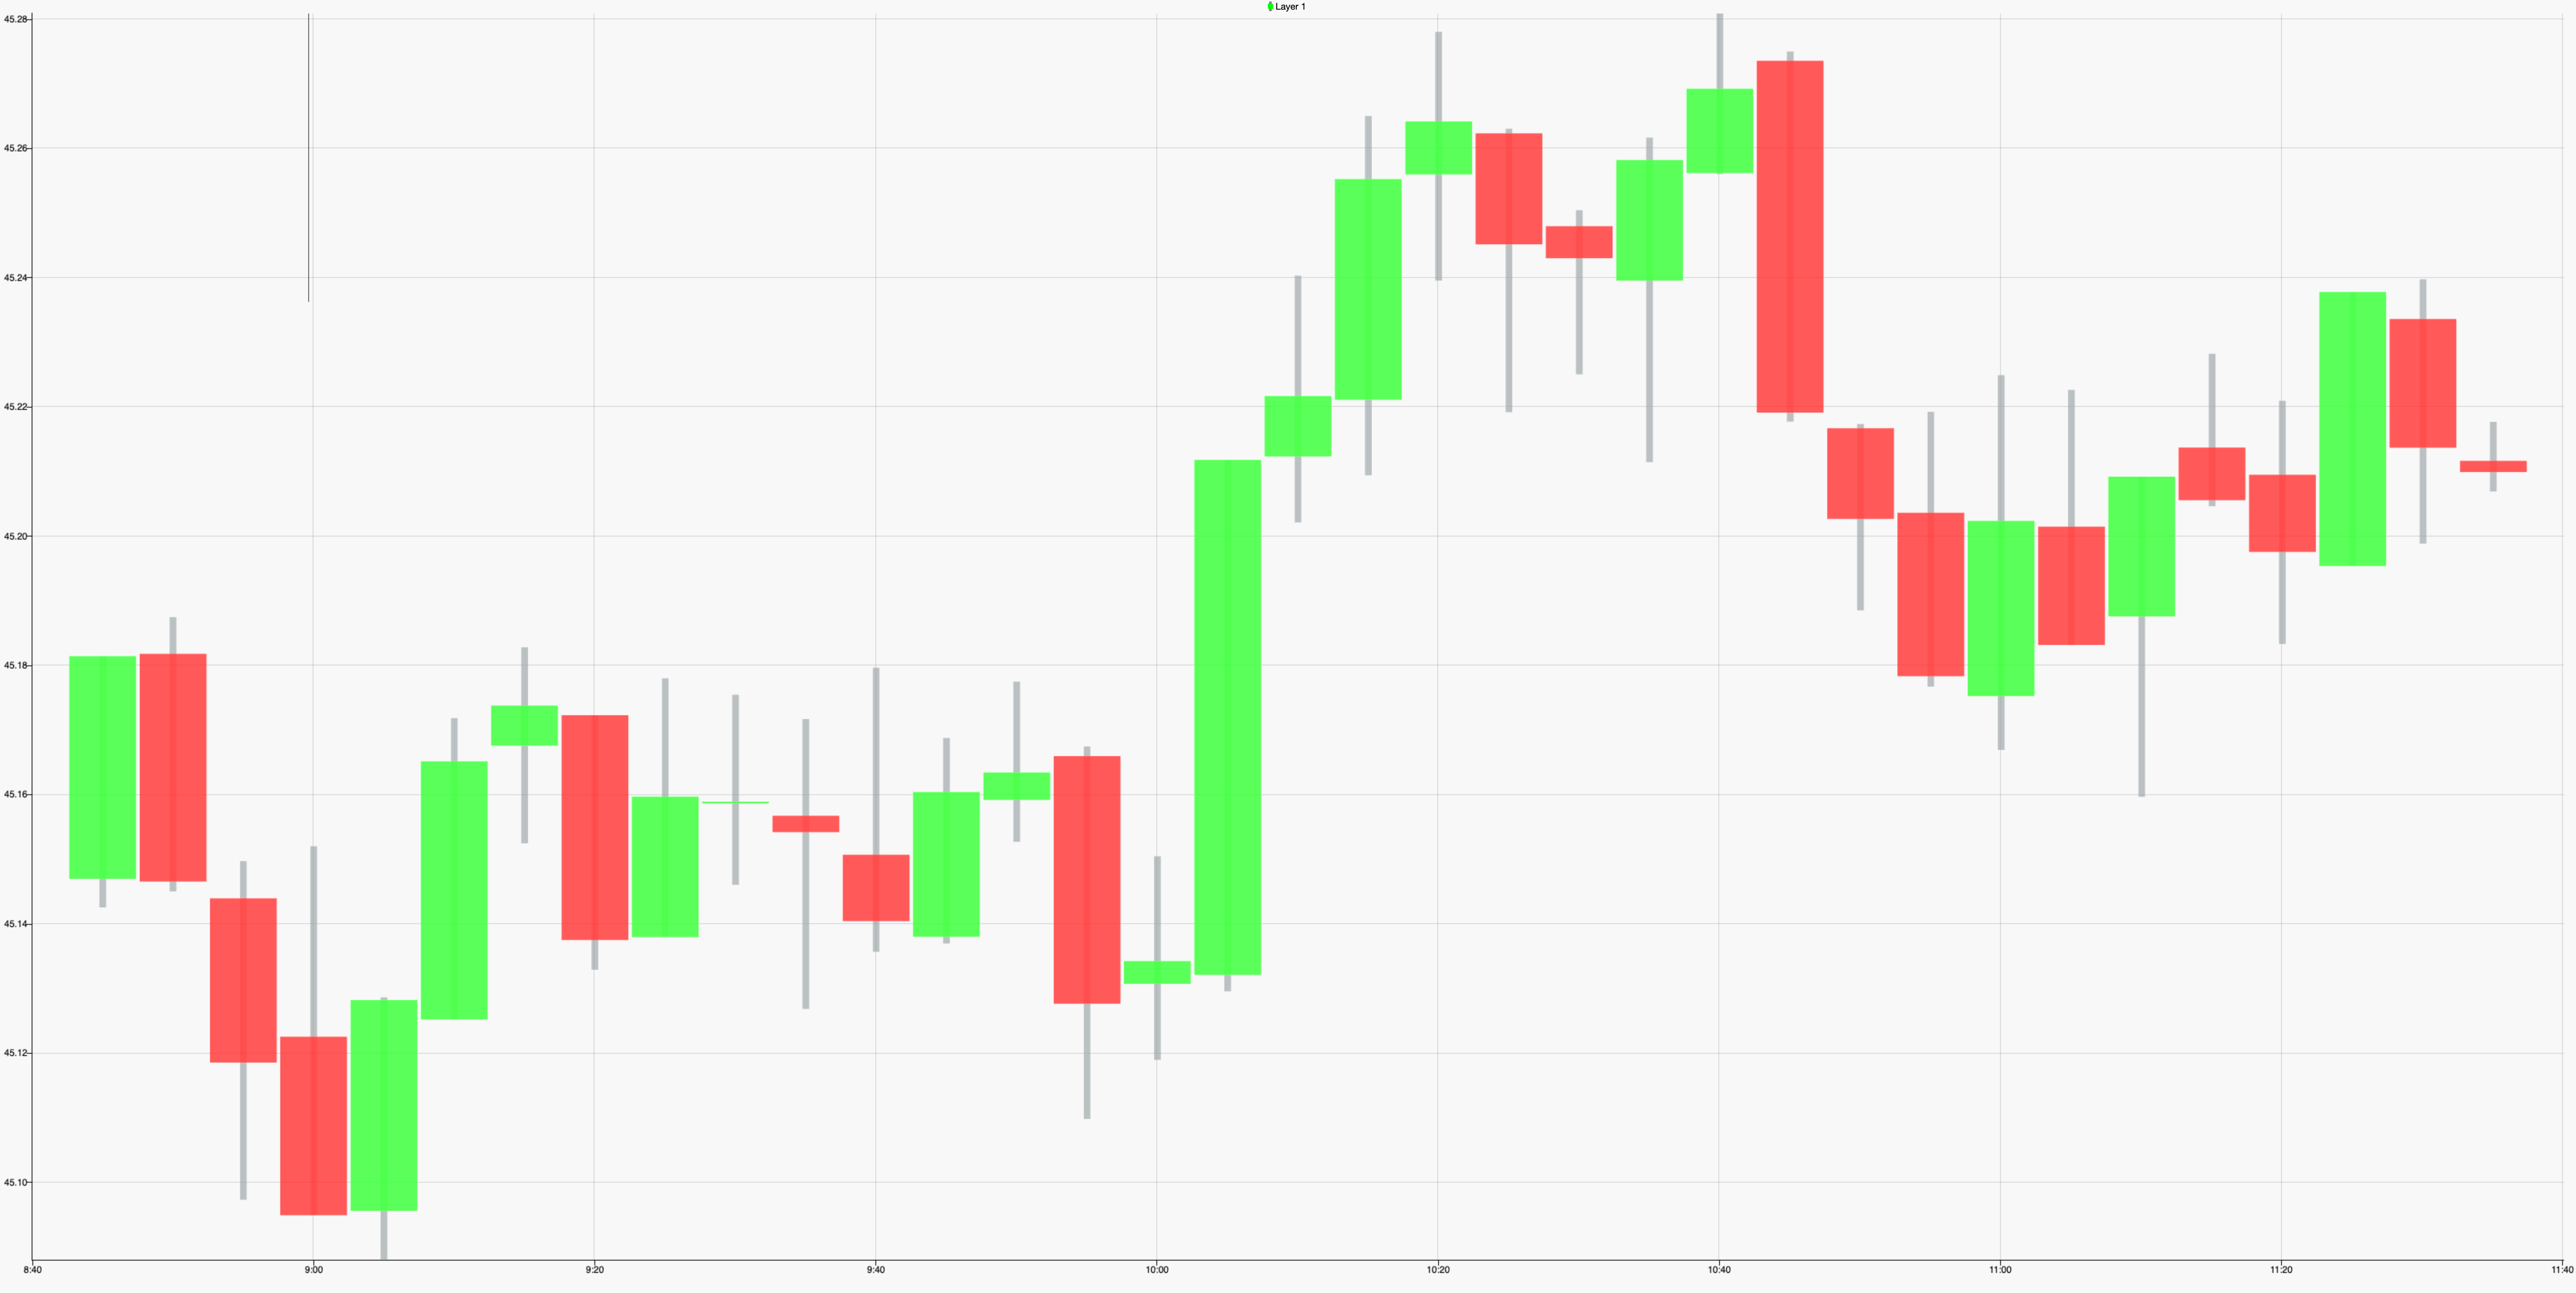

### Example 2: VWAP (Volume-Weighted Average Price) 🏋️‍♀️

According to [investopedia](https://www.investopedia.com/terms/v/vwap.asp):

> VWAP is calculated by totaling the dollars traded for every transaction (price multiplied by the volume) and then dividing by the total shares traded.

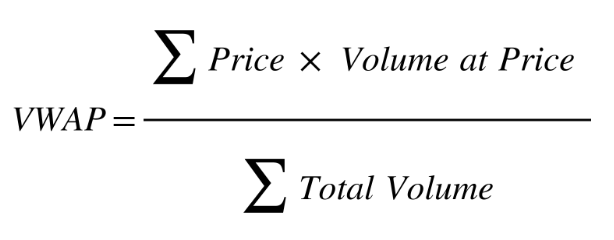

In [57]:
select time,price,vwap:sums[price*size]%sums size from trade where sym=`AMD

time                 price    vwap    
--------------------------------------
0D12:21:02.368412000 45.14688 45.14688
0D12:21:06.368434000 45.15094 45.14923
0D12:21:07.368438000 45.14721 45.14796
0D12:21:08.367962000 45.14462 45.147  
0D12:21:09.368431000 45.14291 45.14584
0D12:21:13.368029000 45.14245 45.14494
0D12:21:15.368434000 45.14421 45.14484
0D12:21:16.368429000 45.14281 45.14445
0D12:21:19.368435000 45.14724 45.14471
0D12:21:22.368429000 45.15133 45.14507
0D12:21:26.368413000 45.14953 45.14565
0D12:21:27.368365000 45.15383 45.14601
0D12:21:27.368365000 45.15829 45.14616
0D12:21:28.367746000 45.1588  45.14728
0D12:21:29.368360000 45.15886 45.14778
0D12:21:29.368360000 45.1587  45.14834
0D12:21:30.368323000 45.1603  45.14838
0D12:21:36.368367000 45.16288 45.14858
0D12:21:37.367481000 45.16698 45.14906
0D12:21:40.368430000 45.16544 45.1502 
..


<div class="alert alert-info">

Applying a dyadic operator over two lists acts componentwise.
```q
1 2 3+4 5 6 / 5 7 9
```
</div>

Let's plot vwap!

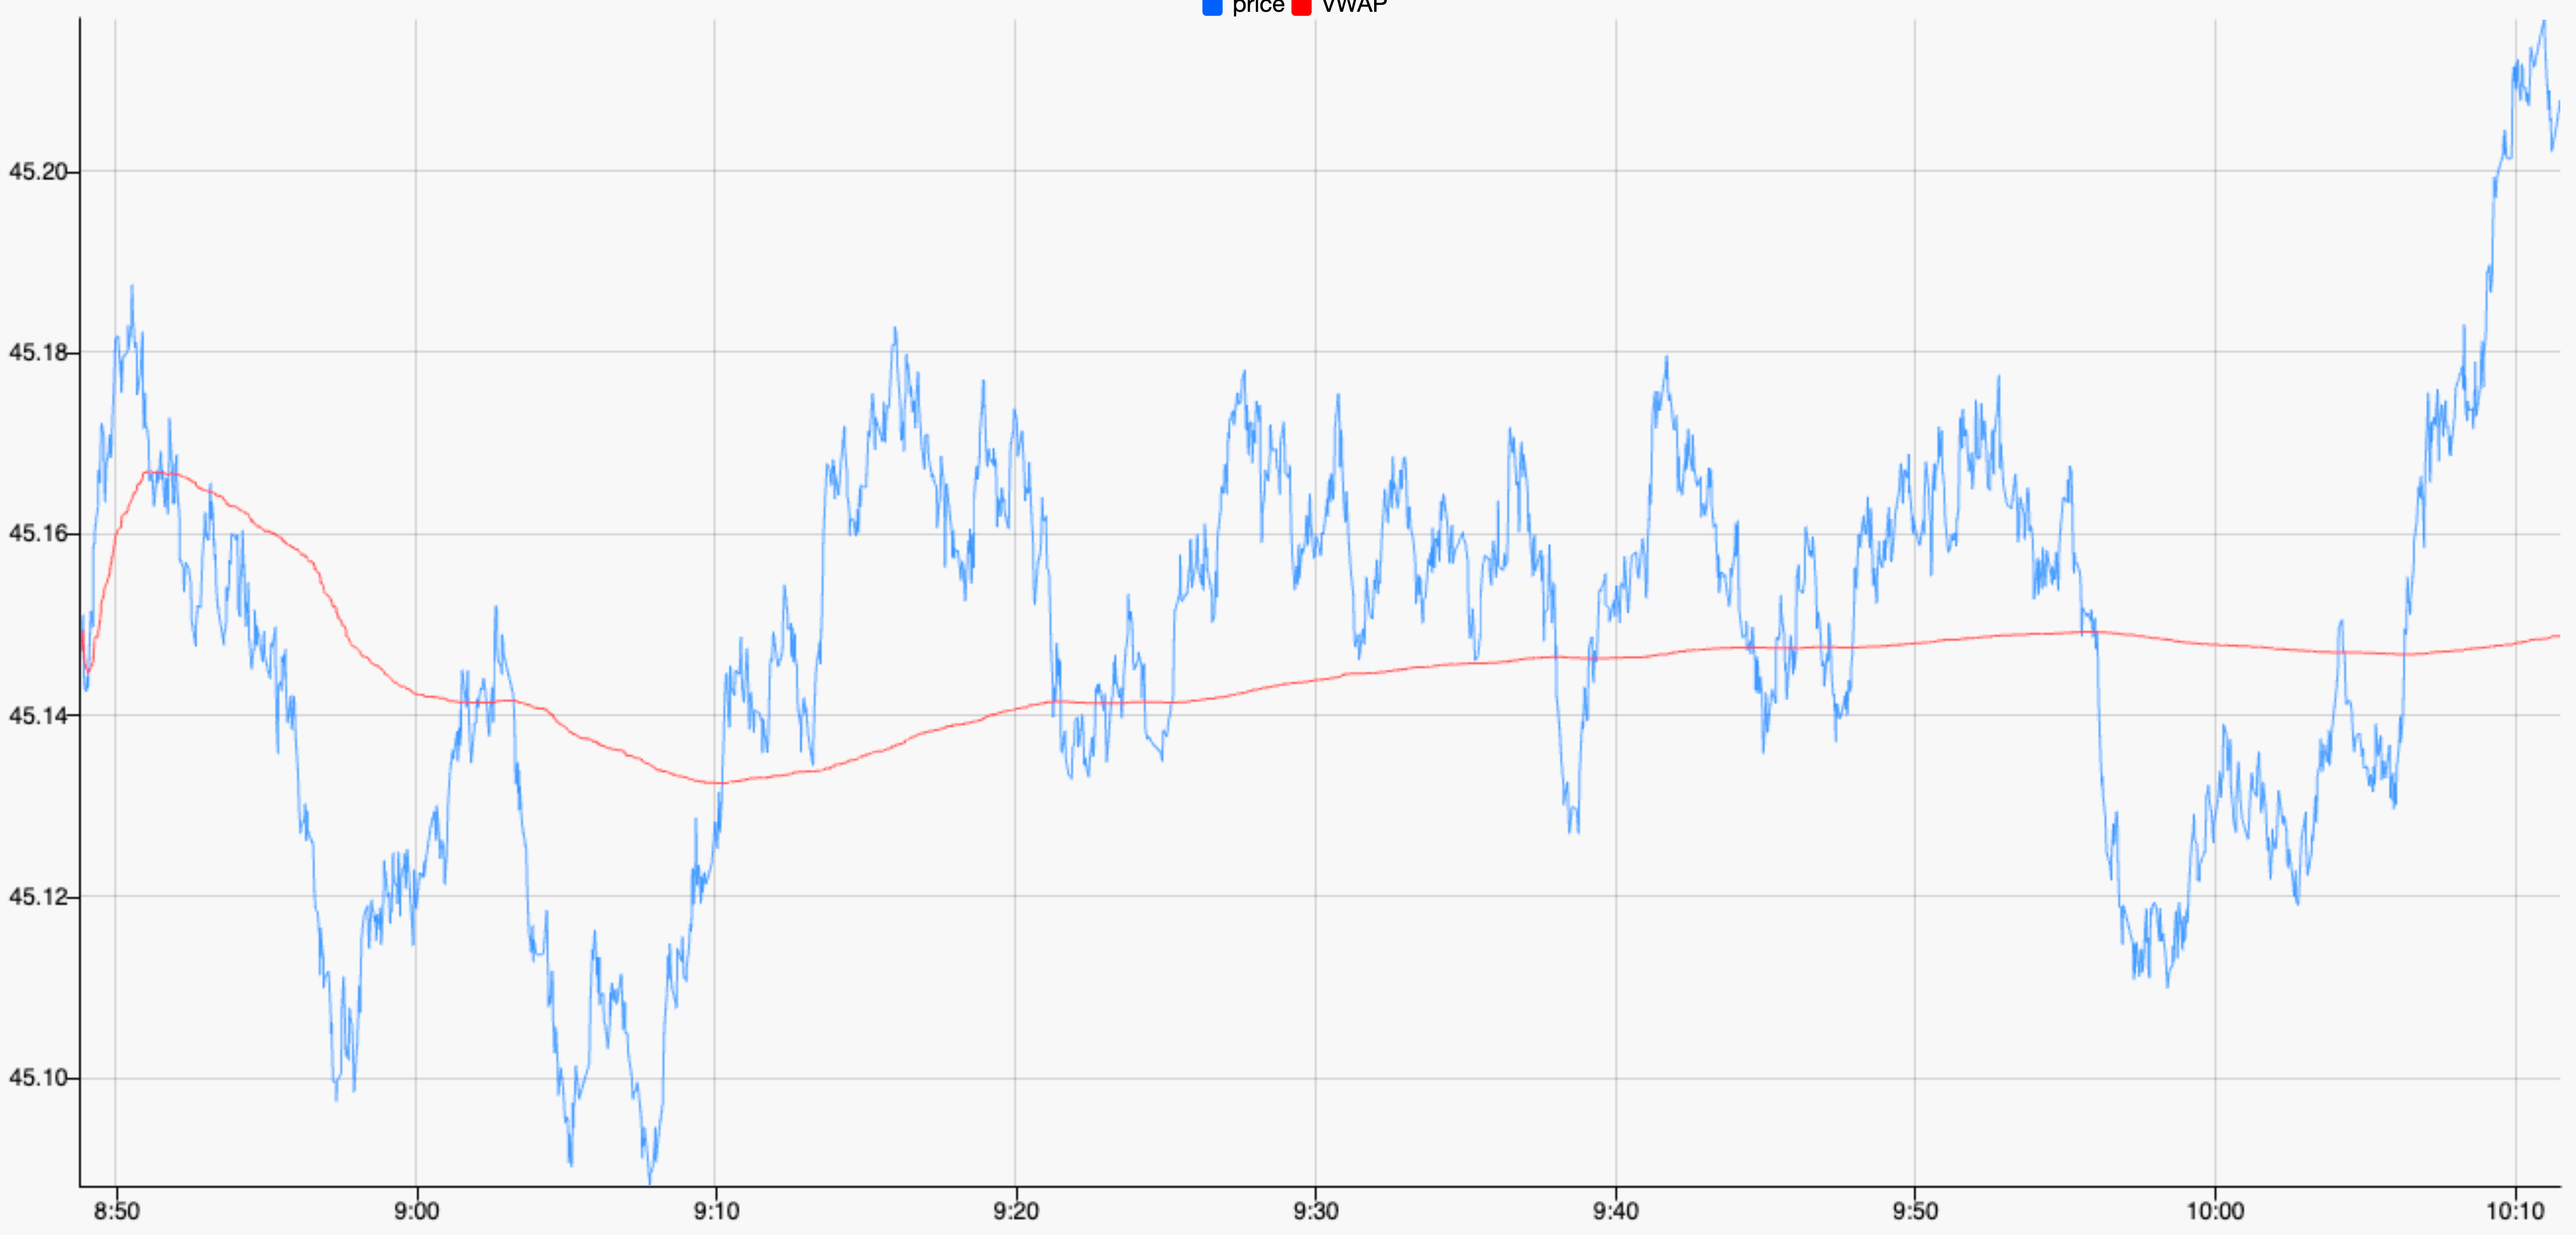

### Example 3: SMA (Simple Moving Average) 🦥

The _moving average indicator_ cuts down the noise of a price chart. Firstly, we can prepare the data to get the close price for each of the previous _n_ minutes.

In [59]:
show t:0!select by 1 xbar `minute$time from trade where sym=`AMD

time  sym price    size
-----------------------
12:21 AMD 45.1686  592 
12:22 AMD 45.17513 808 
12:23 AMD 45.17266 587 
12:24 AMD 45.15194 975 
12:25 AMD 45.15694 917 
12:26 AMD 45.14858 286 
12:27 AMD 45.13897 272 
12:28 AMD 45.11546 304 
12:29 AMD 45.10754 369 
12:30 AMD 45.11622 88  
12:31 AMD 45.12076 304 
12:32 AMD 45.12725 489 
12:33 AMD 45.13879 209 
12:34 AMD 45.14571 343 
12:35 AMD 45.11622 351 
12:36 AMD 45.09788 668 
12:37 AMD 45.10417 14  
12:38 AMD 45.1079  172 
12:39 AMD 45.08799 676 
12:40 AMD 45.11413 630 
..


<div class="alert alert-info">

When no aggregator is selected in the context of a `by` query, q assumes that you just want to keep the very last record.
</div>

Now, we can include the standard `mavg` indicator as part of the query. It takes two arguments: the window size and the list of values.

In [61]:
select time,price,10 mavg price from t

time  price    price1  
-----------------------
12:21 45.1686  45.1686 
12:22 45.17513 45.17186
12:23 45.17266 45.17213
12:24 45.15194 45.16708
12:25 45.15694 45.16505
12:26 45.14858 45.16231
12:27 45.13897 45.15897
12:28 45.11546 45.15353
12:29 45.10754 45.14842
12:30 45.11622 45.1452 
12:31 45.12076 45.14042
12:32 45.12725 45.13563
12:33 45.13879 45.13225
12:34 45.14571 45.13162
12:35 45.11622 45.12755
12:36 45.09788 45.12248
12:37 45.10417 45.119  
12:38 45.1079  45.11825
12:39 45.08799 45.11629
12:40 45.11413 45.11608
..


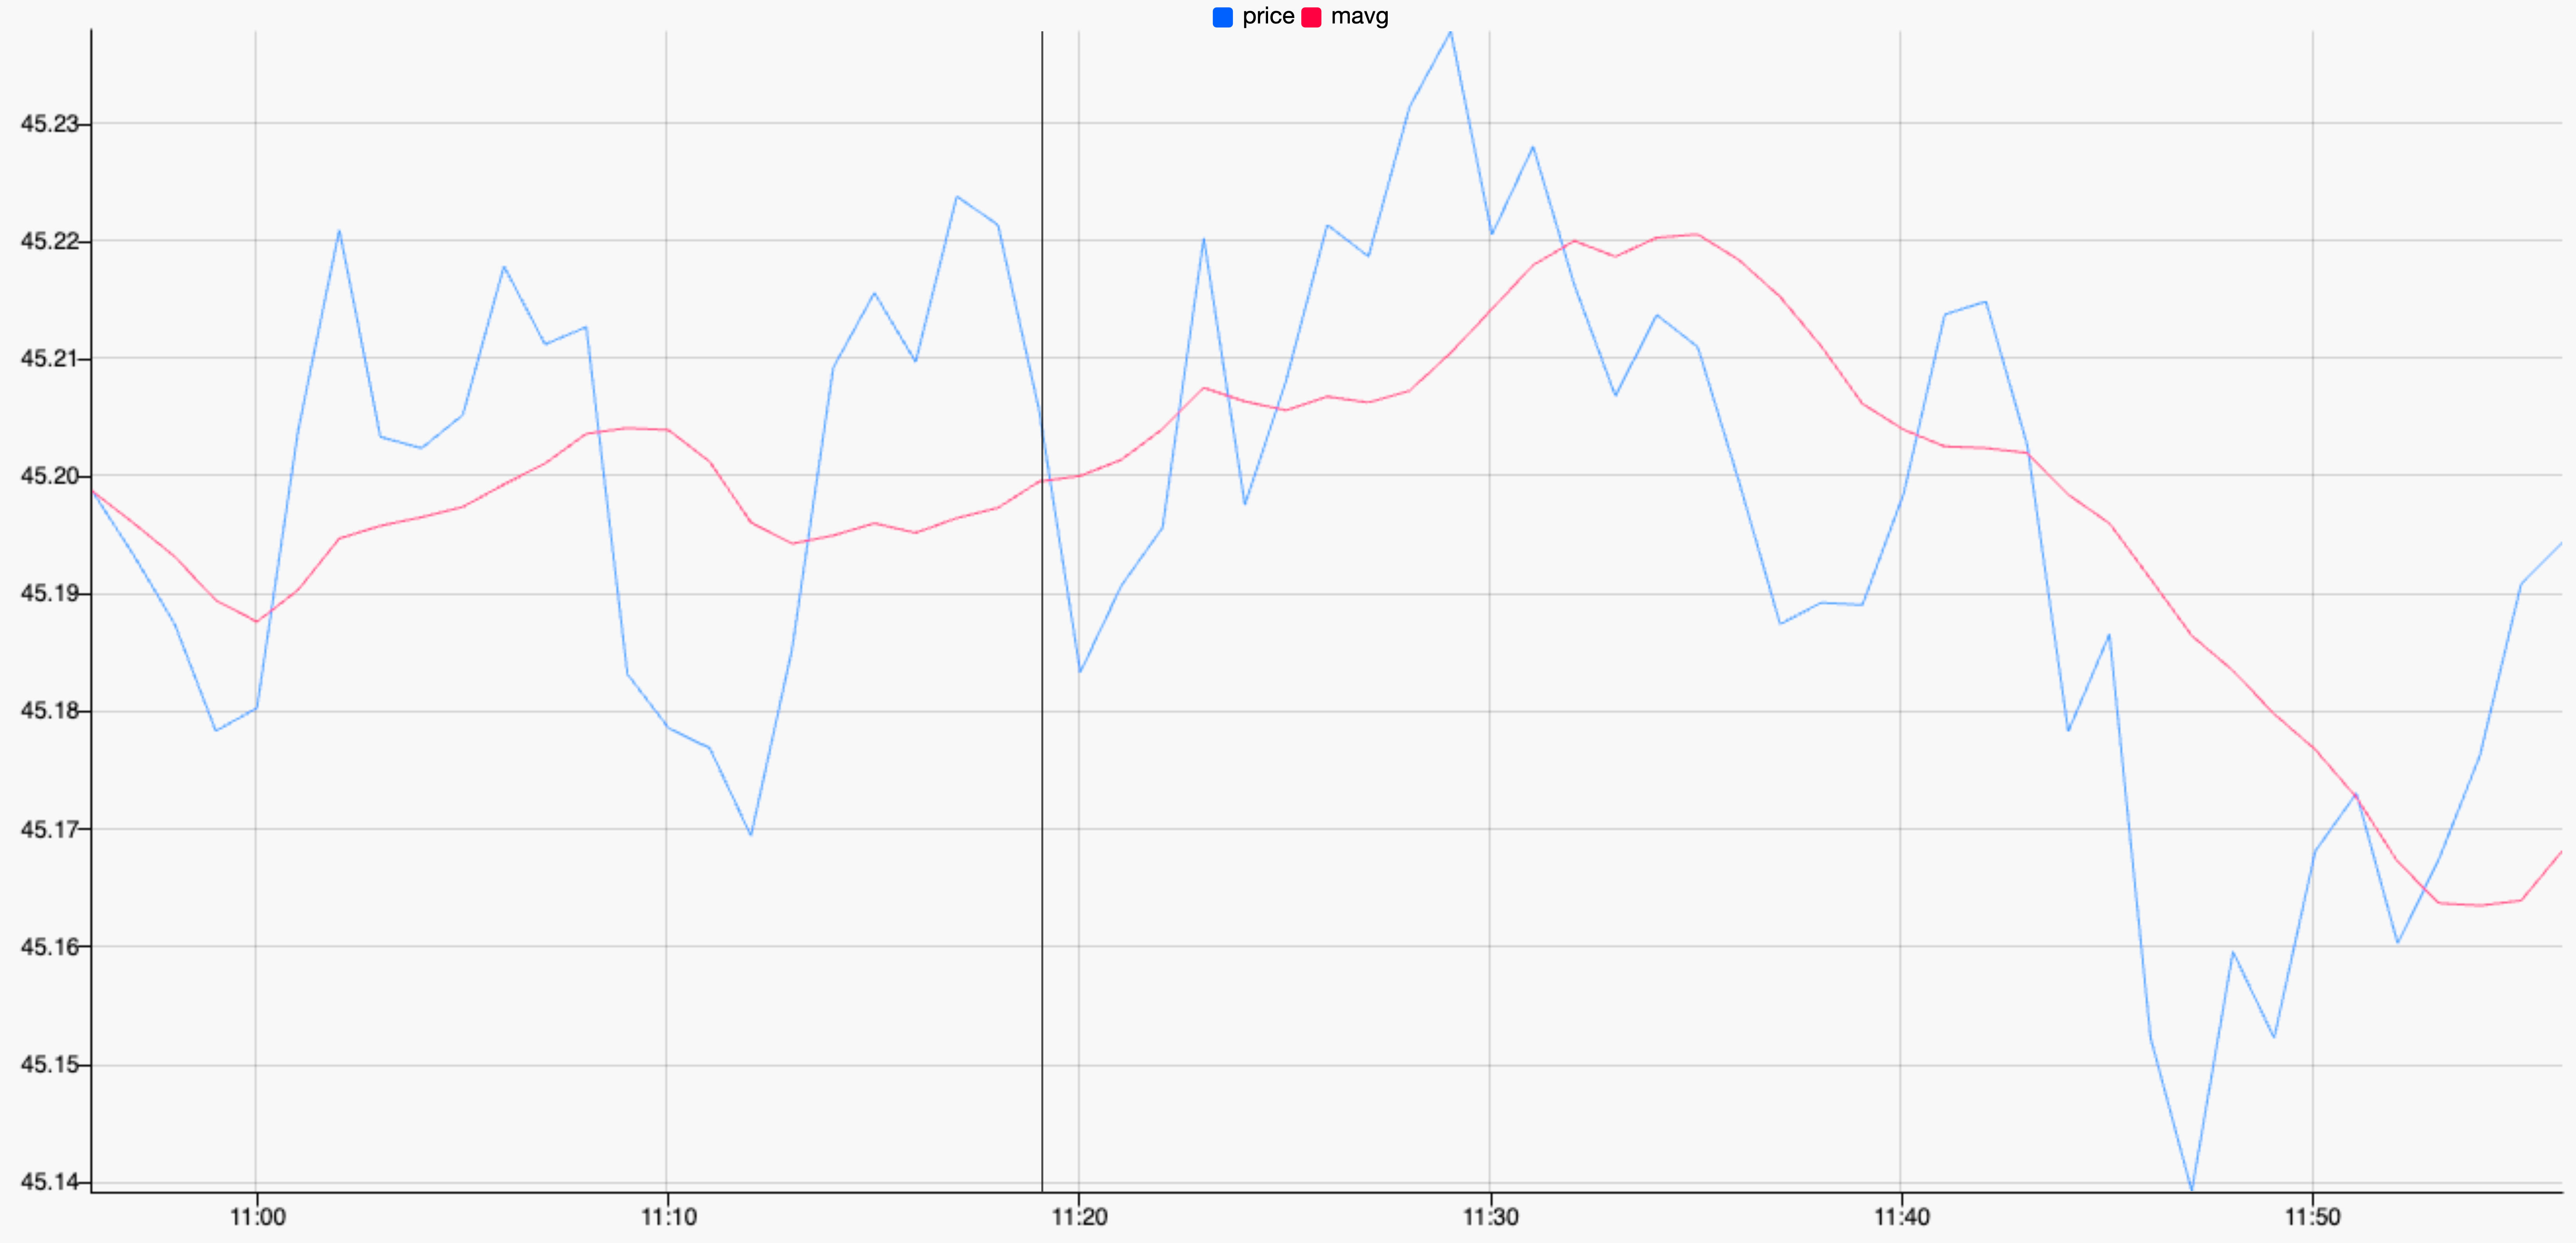

### Example 4: MACD (Moving Average Convergence Divergence)🚨

Investopedia [says](https://www.investopedia.com/terms/m/macd.asp#:~:text=Moving%20average%20convergence%2Fdivergence%20(MACD%2C%20or%20MAC%2DD,from%20the%2012%2Dperiod%20EMA.):
> Moving average convergence/divergence (MACD, or MAC-D) is a trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of a security’s price. The MACD line is calculated by subtracting the 26-period EMA from the 12-period EMA.

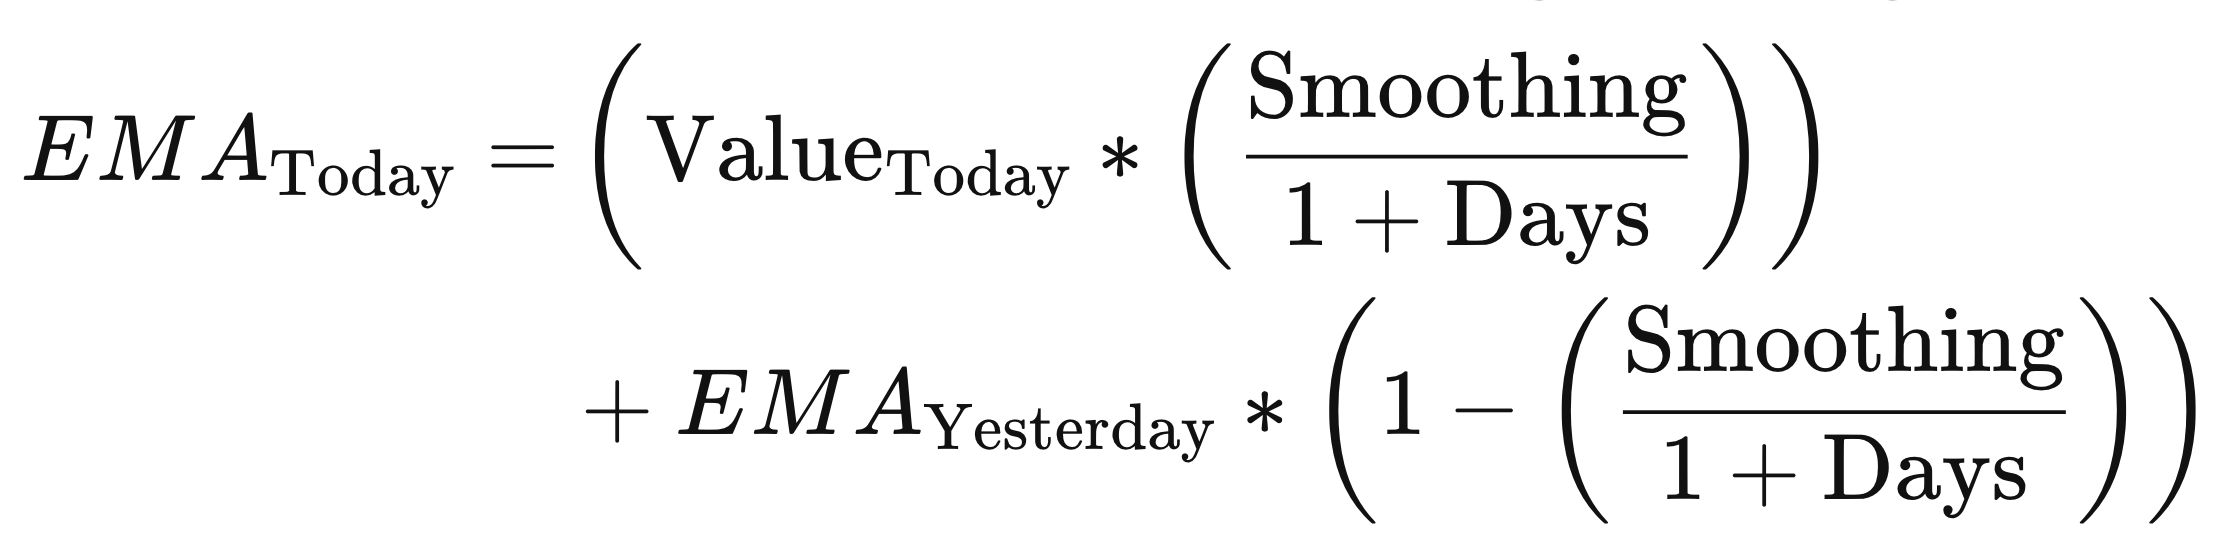

In [63]:
show macdt:select time,macd:ema[2%13;price]-ema[2%27;price] from trade where sym=`AMD

time                 macd         
----------------------------------
0D12:21:02.368412000 0            
0D12:21:06.368434000 0.0003241001 
0D12:21:07.368438000 0.0002770178 
0D12:21:08.367962000 3.021303e-05 
0D12:21:09.368431000 -0.0003000348
0D12:21:13.368029000 -0.0005919057
0D12:21:15.368434000 -0.0006733653
0D12:21:16.368429000 -0.0008413284
0D12:21:19.368435000 -0.0006098993
0D12:21:22.368429000 -9.560142e-05
0D12:21:26.368413000 0.0001649902 
0D12:21:27.368365000 0.000710337  
0D12:21:27.368365000 0.001485406  
0D12:21:28.367746000 0.002116249  
0D12:21:29.368360000 0.00259148   
0D12:21:29.368360000 0.002921556  
0D12:21:30.368323000 0.00327456   
0D12:21:36.368367000 0.003719394  
0D12:21:37.367481000 0.004352231  
0D12:21:40.368430000 0.00467598   
..


> A nine-day EMA of the MACD line is called the signal line, which is then plotted on top of the MACD line, which can function as a trigger for buy or sell signals.

In [64]:
update sig:ema[2%10;macd] from macdt

time                 macd          sig          
------------------------------------------------
0D12:21:02.368412000 0             0            
0D12:21:06.368434000 0.0003241001  6.482003e-05 
0D12:21:07.368438000 0.0002770178  0.0001072596 
0D12:21:08.367962000 3.021303e-05  9.185028e-05 
0D12:21:09.368431000 -0.0003000348 1.347325e-05 
0D12:21:13.368029000 -0.0005919057 -0.0001076025
0D12:21:15.368434000 -0.0006733653 -0.0002207551
0D12:21:16.368429000 -0.0008413284 -0.0003448697
0D12:21:19.368435000 -0.0006098993 -0.0003978756
0D12:21:22.368429000 -9.560142e-05 -0.0003374208
0D12:21:26.368413000 0.0001649902  -0.0002369386
0D12:21:27.368365000 0.000710337   -4.748349e-05
0D12:21:27.368365000 0.001485406   0.0002590945 
0D12:21:28.367746000 0.002116249   0.0006305254 
0D12:21:29.368360000 0.00259148    0.001022716  
0D12:21:29.368360000 0.002921556   0.001402484  
0D12:21:30.368323000 0.00327456    0.001776899  
0D12:21:36.368367000 0.003719394   0.002165398  
0D12:21:37.367481000

We can now plot the macd and signal lines. It may useful to supply a histogram that remarks the differences among them as well.

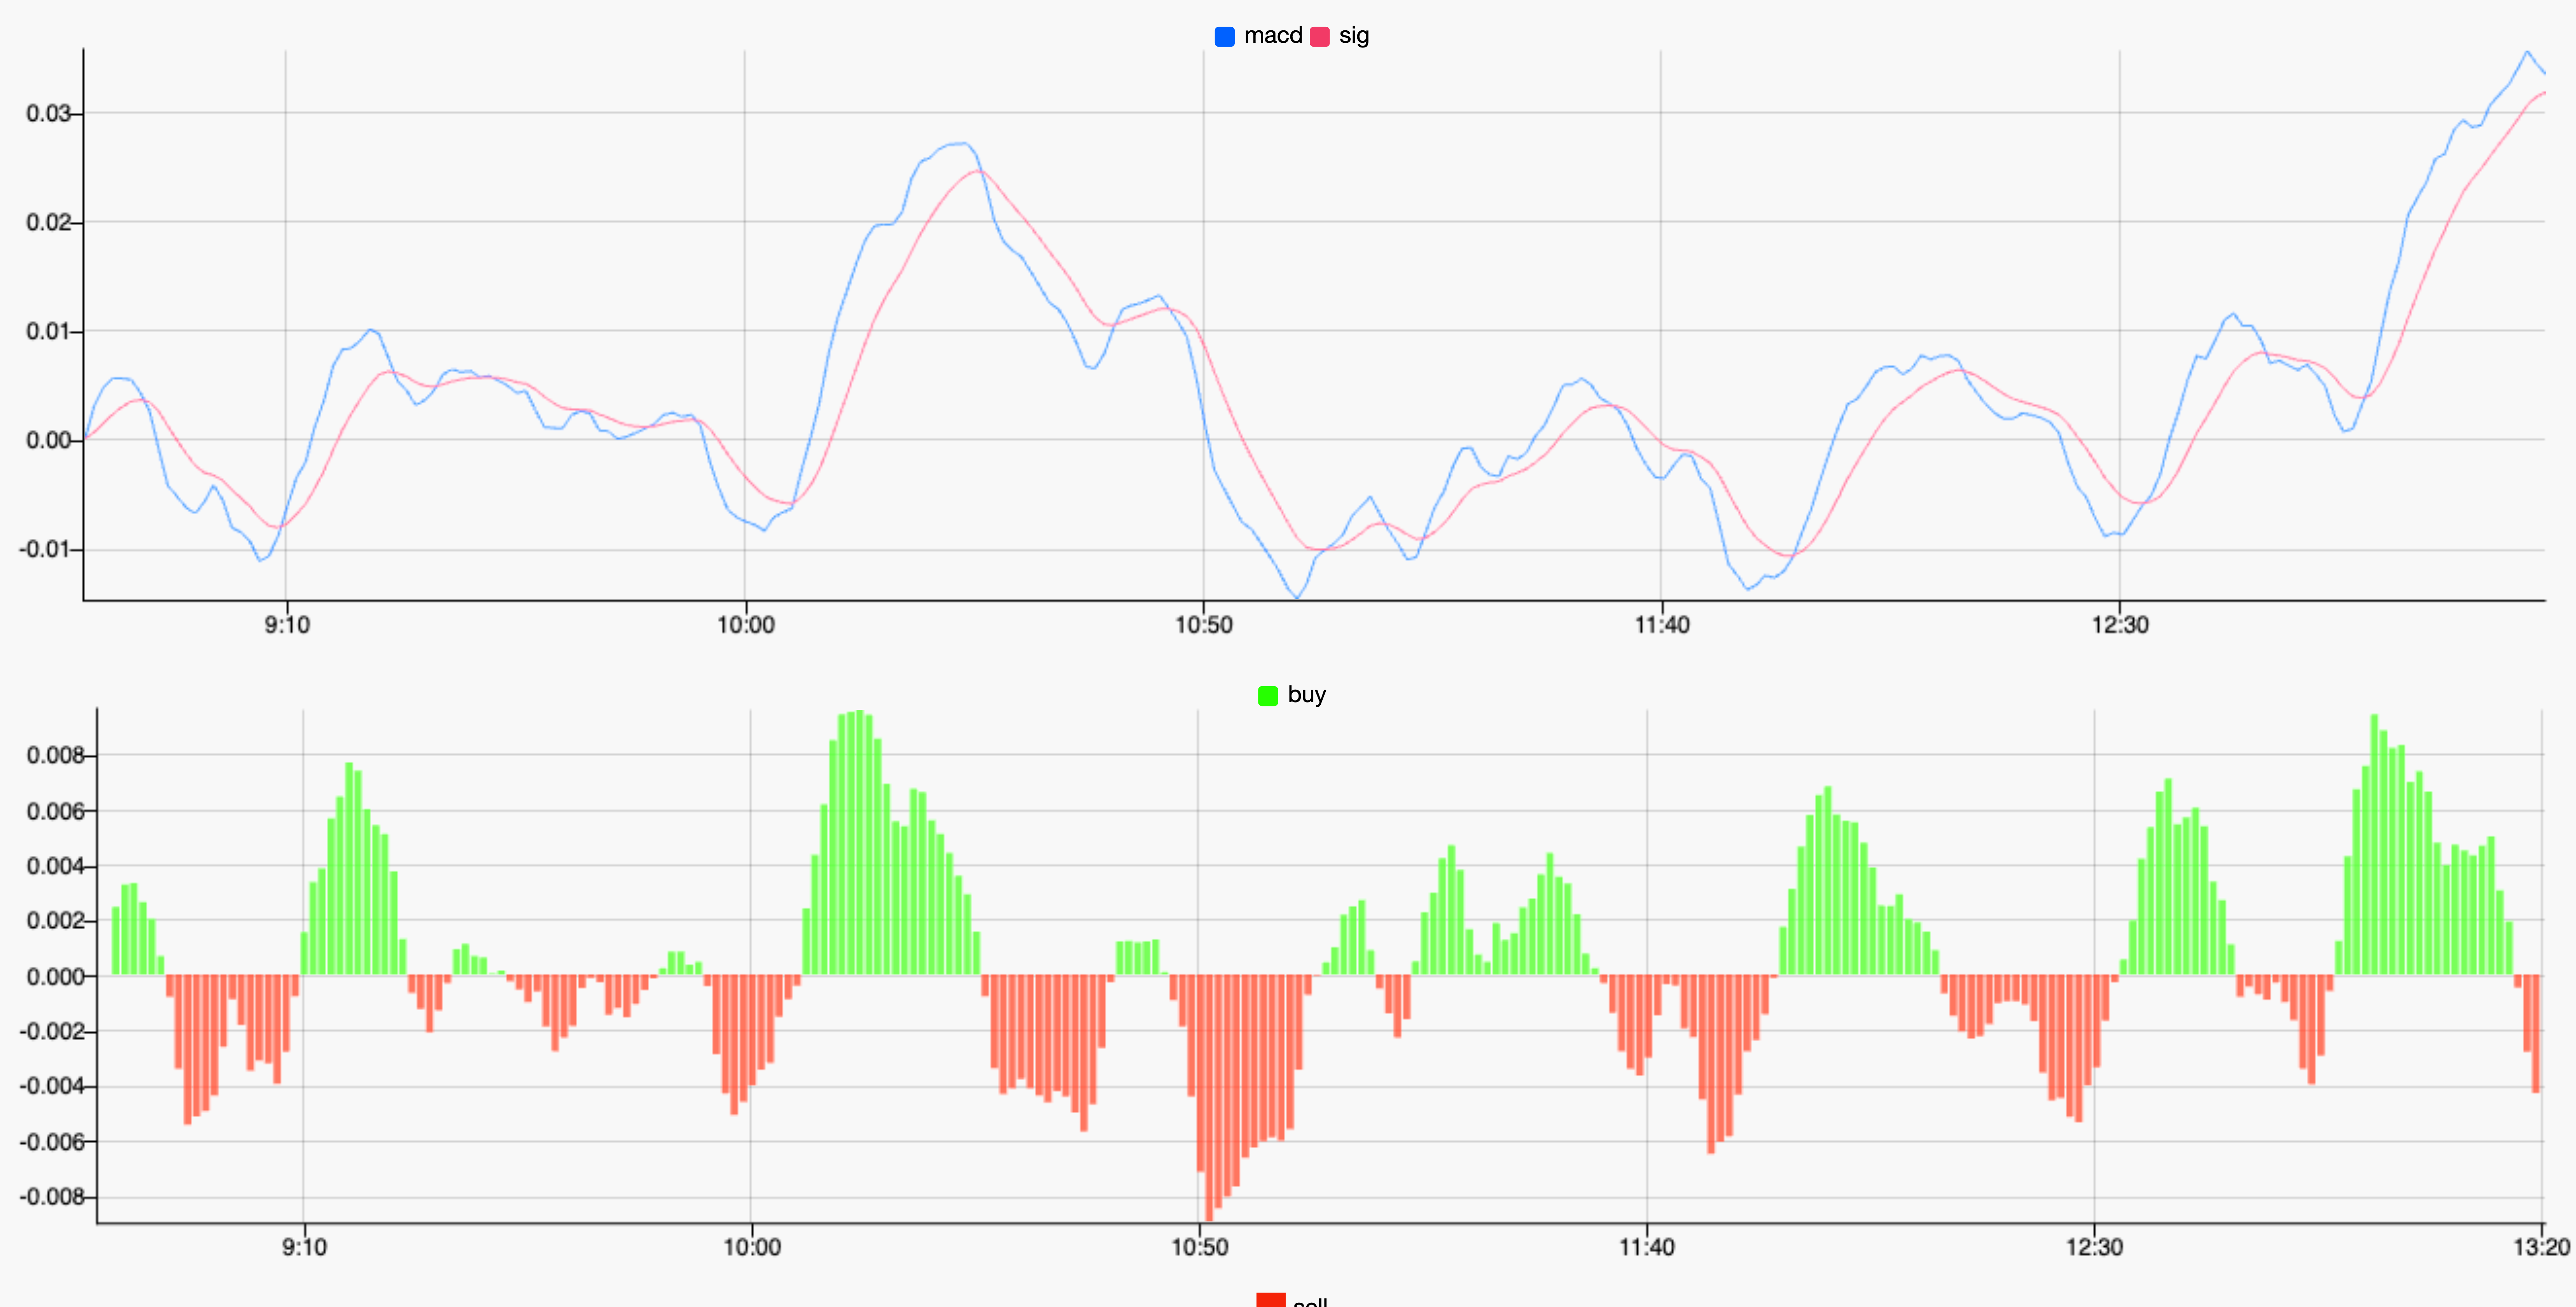

### IPC (Interprocess Communication) ☎️

The very first code cell from this notebook opened a connection and assigned it to h. This is just a handle that allows us to connect with other q processes.

In [65]:
h

8i


For instance, we could ask another process to execute an expression (as a string) for us.

In [66]:
h"1+1"

2


We could use a parse-tree notation for the task, which is safer.

By simply negating the handle, we can establish an asynchronous connection.

These kinds of communications turn out to be essential for the tick architecture.